In [6]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_json("logins.json")

In [8]:
df.head(20)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [10]:
df = df.set_index('login_time')

In [11]:
df.head(20)

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
1970-01-01 20:21:41
1970-01-01 20:12:16
1970-01-01 20:35:47
1970-01-01 20:35:38


In [12]:
df['count'] = 1

In [13]:
df.sort_index().head(20)

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


In [15]:
df5 = df.resample('5t').sum()
df5.head(10)

,count
login_time,
1970-01-01 20:10:00,2
1970-01-01 20:15:00,3
1970-01-01 20:20:00,1
1970-01-01 20:25:00,2
1970-01-01 20:30:00,3
1970-01-01 20:35:00,4
1970-01-01 20:40:00,2
1970-01-01 20:45:00,4
1970-01-01 20:50:00,0


In [20]:
df15 = df.resample('15t').sum()

In [22]:
df15.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [ ]:
#Total logins viz

In [27]:
df15["count"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
5%          1.000000
25%         3.000000
50%         7.000000
75%        13.000000
90%        20.300000
95%        26.000000
99%        38.000000
max        73.000000
Name: count, dtype: float64

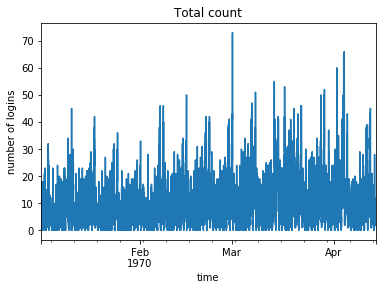

In [29]:
df15['count'].plot(title='Total count')
plt.ylabel('number of logins')
plt.xlabel('time')

plt.show()

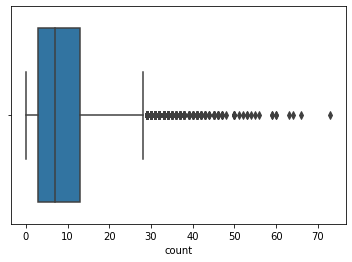

In [32]:
sns.boxplot(x=df15['count'])

Text(0.5, 0, 'time')

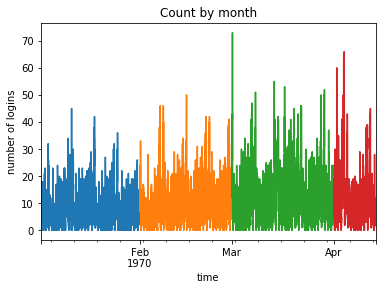

In [34]:
df15.loc['1970-01','count'].plot(title='Count by month')
df15.loc['1970-02','count'].plot()
df15.loc['1970-03','count'].plot()
df15.loc['1970-04','count'].plot()

plt.ylabel('number of logins')
plt.xlabel('time')

In [35]:
# max logins by month
print('January:', df15.loc['1970-01','count'].max())
print('February:', df15.loc['1970-02','count'].max())
print('March:', df15.loc['1970-03','count'].max())
print('April:', df15.loc['1970-04','count'].max())

January: 45
February: 50
March: 73
April: 66


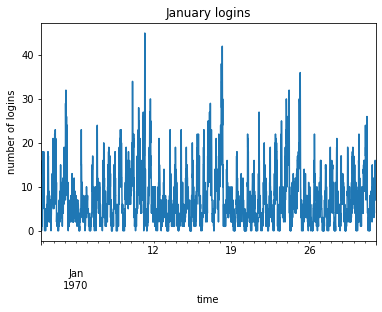

In [42]:
df15.loc['1970-01','count'].plot(title='January logins')

plt.ylabel('number of logins')
plt.xlabel('time')


plt.show()

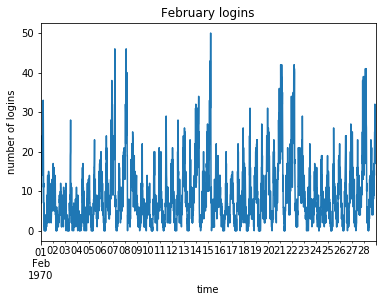

In [43]:
df15.loc['1970-02','count'].plot(title='February logins')

plt.ylabel('number of logins')
plt.xlabel('time')

plt.show()

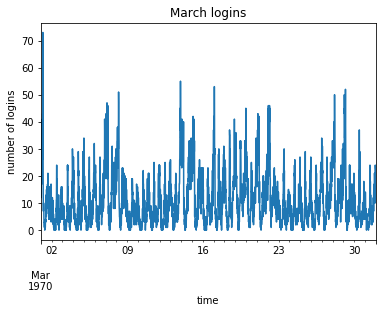

In [44]:
df15.loc['1970-03','count'].plot(title='March logins')

plt.ylabel('number of logins')
plt.xlabel('time')

plt.show()

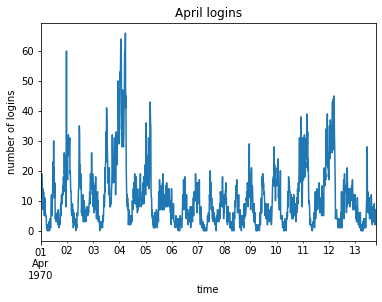

In [45]:
df15.loc['1970-04','count'].plot(title='April logins')

plt.ylabel('number of logins')
plt.xlabel('time')

plt.show()

In [46]:
series = df15.reset_index()['login_time']

In [62]:
series.dt.dayofweek[:305]

0      3
1      3
2      3
3      3
4      3
      ..
300    6
301    6
302    6
303    6
304    0
Name: login_time, Length: 305, dtype: int64

In [63]:
df15['day_of_week'] = series.dt.dayofweek.values

In [68]:
df15.head(20)

,count,day_of_week
login_time,,
1970-01-01 20:00:00,2,3
1970-01-01 20:15:00,6,3
1970-01-01 20:30:00,9,3
1970-01-01 20:45:00,7,3
1970-01-01 21:00:00,1,3
1970-01-01 21:15:00,4,3
1970-01-01 21:30:00,0,3
1970-01-01 21:45:00,4,3
1970-01-01 22:00:00,9,3


In [70]:
groupby_dow = df15.groupby('day_of_week').mean()

In [71]:
avg_count = groupby_dow.sort_values('count', ascending=False)
avg_count

,count
day_of_week,
5,13.456250
6,12.615972
4,10.561111
3,8.794118
2,7.692708
1,6.895833
0,6.213380


In [74]:
df15.loc['1970-02-26':'1970-03-02', ['count', 'day_of_week']].sort_values('count',ascending=False).head(10)

,count,day_of_week
login_time,,
1970-03-01 04:30:00,73,6
1970-03-01 04:45:00,48,6
1970-03-01 04:00:00,43,6
1970-03-01 04:15:00,41,6
1970-02-28 04:45:00,41,5
1970-03-01 03:15:00,41,6
1970-02-28 03:15:00,41,5
1970-02-27 23:15:00,39,4
1970-02-28 02:15:00,39,5


In [75]:
# highest log avg in was on Saturday(day_of_week = 5) according to the average count; however, the largest numbers of logins
# have occured on Sunday(day_of_week = 6).

In [76]:
#Logins by time of day

In [78]:
df15['day'] = df15.reset_index()['login_time'].dt.day.values

In [80]:
df15.head(20)

,count,day_of_week,day
login_time,,,
1970-01-01 20:00:00,2,3,1
1970-01-01 20:15:00,6,3,1
1970-01-01 20:30:00,9,3,1
1970-01-01 20:45:00,7,3,1
1970-01-01 21:00:00,1,3,1
1970-01-01 21:15:00,4,3,1
1970-01-01 21:30:00,0,3,1
1970-01-01 21:45:00,4,3,1
1970-01-01 22:00:00,9,3,1


In [81]:
January = df15['1970-01'].groupby('day')['count'].sum()
February = df15['1970-02'].groupby('day')['count'].sum()
March = df15['1970-03'].groupby('day')['count'].sum()
April = df15['1970-04'].groupby('day')['count'].sum()

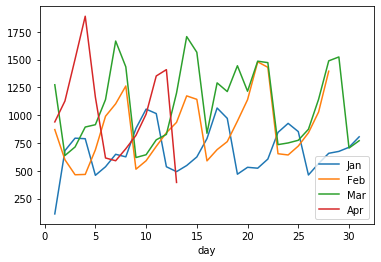

In [82]:
January.plot()
February.plot()
March.plot()
April.plot()

plt.legend(['Jan', 'Feb', 'Mar', 'Apr'])

plt.show()

In [86]:
# the day of the month likely unrelated to number of logins

In [87]:
df15['hour'] = df15.reset_index()['login_time'].dt.hour.values
df15['minute'] = df15.reset_index()['login_time'].dt.minute.values

In [88]:
df15.head(10)

,count,day_of_week,day,hour,minute
login_time,,,,,
1970-01-01 20:00:00,2,3,1,20,0
1970-01-01 20:15:00,6,3,1,20,15
1970-01-01 20:30:00,9,3,1,20,30
1970-01-01 20:45:00,7,3,1,20,45
1970-01-01 21:00:00,1,3,1,21,0
1970-01-01 21:15:00,4,3,1,21,15
1970-01-01 21:30:00,0,3,1,21,30
1970-01-01 21:45:00,4,3,1,21,45
1970-01-01 22:00:00,9,3,1,22,0


In [89]:
df15.groupby('hour')['count'].sum().sort_values(ascending=False)

hour
22    6607
1     6317
23    6058
0     5993
2     5800
11    5799
21    5623
4     5034
12    4964
3     4831
20    4103
13    3611
14    3426
19    3235
10    3064
15    3038
18    2980
5     2945
16    2832
17    2584
9     1527
6     1138
8      818
7      815
Name: count, dtype: int64

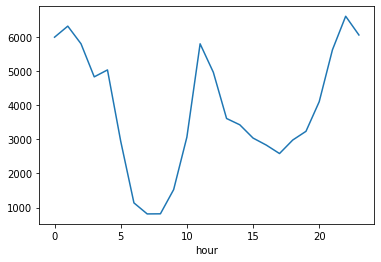

In [90]:
df15.groupby('hour')['count'].sum().plot()

In [ ]:
#highest login count is at start of day till 3AM than picks back up at 10AM to 1PM and than picks back up from 8pm to the end of day